# OpenCV operations

## 1.) Histogram Equalization

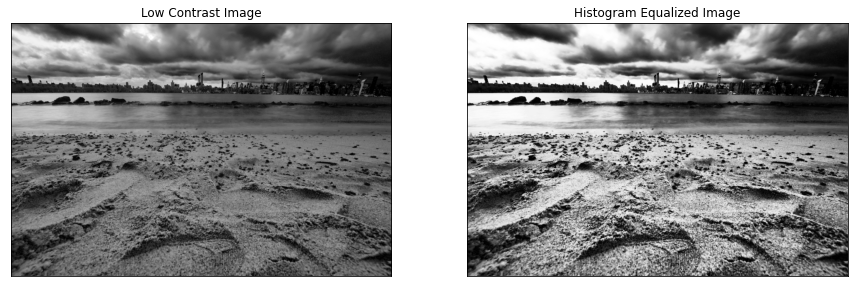

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Read image and convert it to grayscale
img = cv2.imread('low_contrast.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Equalize Histograms
eq_image = cv2.equalizeHist(img)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title("Low Contrast Image")
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.title("Histogram Equalized Image")
plt.imshow(eq_image, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.show()
# plt.savefig("Histogram Equalization.jpg")

## 2.) Histogram Matching

In [179]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

img1 = cv2.imread('low_contrast.jpg', 0)
img2 = cv2.imread('reference.jpg', 0)

In [180]:
def find_nearest_above(my_array, target):
    diff = my_array - target
    mask = np.ma.less_equal(diff, -1) # Example less_equal([1,2,3,4], 3) --> [True, True, True, False] 
    if np.all(mask):
        c = np.abs(diff).argmin()
        return c
    masked_diff = np.ma.masked_array(diff, mask)
    return masked_diff.argmin()

In [181]:
def histogram_match(original, specified):
    oldshape = original.shape
    original = original.ravel() # Flatten the array
    specified = specified.ravel()

    s_values, bin_idx, s_counts = np.unique(original, return_inverse=True, return_counts=True)
    t_values, t_counts = np.unique(specified, return_counts=True)

    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]

    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    sour = np.around(s_quantiles*255)
    temp = np.around(t_quantiles*255)

    b=[]
    for data in sour[:]:
        b.append(find_nearest_above(temp, data))
    b = np.array(b, dtype='uint8')
    return b[bin_idx].reshape(oldshape)


In [182]:
a = histogram_match(img1, img2)

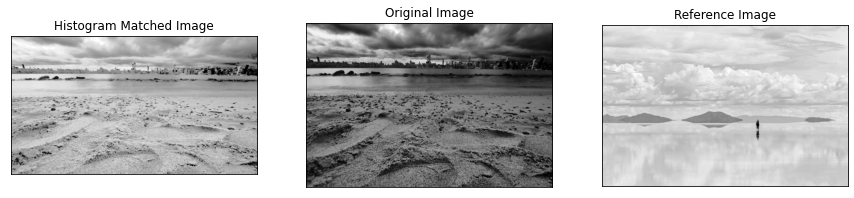

In [183]:
a = np.array(a,dtype='uint8')
a = cv2.resize(a, (960, 540))

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Histogram Matched Image')
plt.xticks([])
plt.yticks([])
plt.imshow(a, cmap='gray')

plt.subplot(1,3,2)
plt.title('Original Image')
plt.xticks([])
plt.yticks([])
plt.imshow(img1, cmap='gray')

plt.subplot(1,3,3)
plt.xticks([])
plt.yticks([])
plt.title('Reference Image')
plt.imshow(img2, cmap='gray')

plt.show()
# plt.savefig("Histogram Matching.jpg")

## 2.1) Using scikit-image instead of opencv

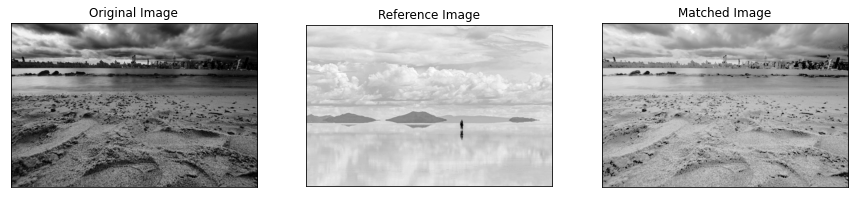

In [184]:
import numpy as np
import skimage
from skimage.exposure import match_histograms
from skimage import io
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img1 = io.imread('low_contrast.jpg', as_gray=True)
img2 = io.imread('reference.jpg', as_gray=True)

matched = match_histograms(img1, img2, multichannel=False)

plt.figure(figsize = (15,5))

plt.subplot(131)
plt.title('Original Image')
plt.imshow(img1, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.title('Reference Image')
plt.imshow(img2,cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.title('Matched Image')
plt.imshow(matched, cmap='gray')


plt.xticks([])
plt.yticks([])
plt.show()

## 3.) Creating Red Boxes

In [188]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
image = cv2.imread('img1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# If pixel value is greater than threshold, assign a value to it, else a different value is assigned to it.
ret, thresh = cv2.threshold(image_gray, 127, 255, 0)
# Find the contours of the image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [189]:
boxes = []
for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    boxes.append([x,y, x+w,y+h])

boxes = np.asarray(boxes)
left, top = np.min(boxes, axis=0)[:2]
right, bottom = np.max(boxes, axis=0)[2:]


# Draw the rectangle 
image = cv2.rectangle(image, (left,top), (right,bottom), (255, 0, 0), 5)

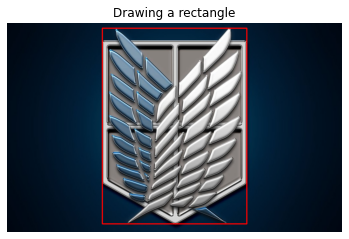

In [190]:
plt.imshow(image)
plt.title('Drawing a rectangle')
plt.axis('off')
plt.show()
# plt.savefig("Drawing Rectangle.jpg")